# Beth Harvey
## Data Analytics Fundamentals Project 7
## February 21, 2023

In [1]:
# Enable matplotlib
%matplotlib inline

In [2]:
# Create data for plot of Celsius vs. Fahrenheit temps
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [3]:
# Import pandas
import pandas as pd

In [4]:
# Save temps as a dataframe
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'Celsius'])

## Plot Celsius vs. Fahrenheit Temperatures

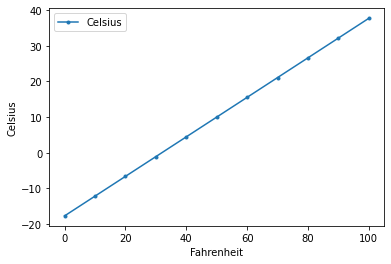

In [5]:
# Plot Celsius vs. Fahrenheit
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

## NYC January Temp Analysis

### Load Data

In [6]:
# Load CSV into a dataframe
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### View Data

In [7]:
# Look at first and last 5 rows of dataframe
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [8]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Data Cleaning

In [9]:
# Rename Value column to Temperature
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [10]:
# View data with new column names
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [11]:
# Check Date column type
nyc.Date.dtype

dtype('int64')

In [12]:
# Remove last 2 digits from Date values to leave just the year
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Describe Data

In [13]:
# Get descriptive statistics for Temperature column
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

The data appears to be very evenly distributed. The mean and median are equal, and the first and third quartiles are nearly equally distant from the mean and median.

## Linear Regression

In [14]:
# Import statistics module
from scipy import stats

In [15]:
# Use linregress() to calculate the slope and intercept for the temperature data
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [16]:
# Get slope
slope = linear_regression.slope
slope

0.014771361132966163

In [17]:
# Get intercept
intercept = linear_regression.intercept
intercept

8.694993233674289

### Predict New Values

In [18]:
# Predict average Fahrenheit temp for January 2019
slope * 2019 + intercept

38.51837136113297

In [19]:
# Predict average Fahrenheit temp for January 1890
slope * 1890 + intercept

36.612865774980335

In [20]:
# Predict average Fahrenheit temp for January 2026
slope * 2026 + intercept

38.62177088906374

### Seaborn Scatter Plot

In [21]:
# import seaborn
import seaborn as sns

(10.0, 70.0)

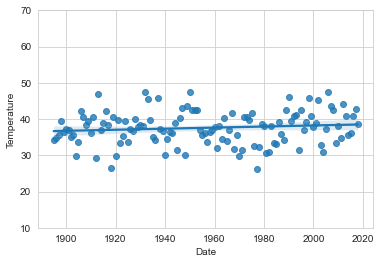

In [22]:
# Create scatter plot with best fit line for the temperature and date
sns.set_style('whitegrid')
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10, 70)

## Simple Linear Regression with Scikit-Learn

In [23]:
# Import train test split
from sklearn.model_selection import train_test_split

In [24]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state = 11)

In [25]:
# Confirm that 75% of the data is in the train set
X_train.shape

(93, 1)

In [26]:
# Confirm that 25% of the data is in the test set
X_test.shape

(31, 1)

### Train the Model

In [27]:
# Import LinearRegression function
from sklearn.linear_model import LinearRegression

In [28]:
# Create estimator
linear_regression2 = LinearRegression()

In [29]:
# Fit model
linear_regression2.fit(X = X_train, y = y_train)

LinearRegression()

In [30]:
# Get model slope
slope2 = linear_regression2.coef_
slope2

array([0.01939167])

In [31]:
# Get model intercept
intercept2 = linear_regression2.intercept_
intercept2

-0.30779820252658396

### Test the Model

In [32]:
# Predict values for test data
predicted = linear_regression2.predict(X_test)

In [33]:
# Save y_test data as expected
expected = y_test

In [34]:
# Display the predicted and expected values for every fifth element in the data
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected: {e: .2f}')

predicted:  37.86, expected:  31.70
predicted:  38.69, expected:  34.80
predicted:  37.00, expected:  39.40
predicted:  37.25, expected:  45.70
predicted:  38.05, expected:  32.30
predicted:  37.64, expected:  33.80
predicted:  36.94, expected:  39.70


### Predicting New Values

In [35]:
# Use coefficient and slope of model to predict the average January temperature for 2019
predict = (lambda x: slope2 * x + intercept2)
predict(2019)

array([38.84399018])

In [36]:
# Predict average January temperature for 1890
predict(1890)

array([36.34246432])

### Plotting With Regression Line

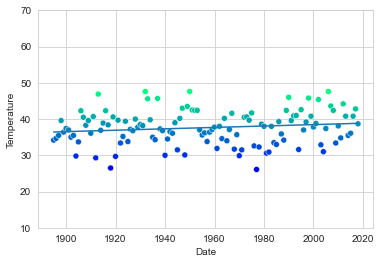

In [37]:
# Create a scatterplot of the temperatures vs the dates
axes2 = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature', hue = 'Temperature', palette = 'winter', legend = False)
axes2.set_ylim(10, 70)

# Add regression line
import numpy as np

# Create array containing minimum and maximum values of the dates
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

# Predict values for x array
y = predict(x)

# Import matplotlib
import matplotlib.pyplot as plt

# Plot best fit line
line = plt.plot(x, y)

## Method Comparison

Both methods provide similar results for a simple linear regression. Stats.lingregress() is a bit simpler, and it only takes 2 inputs, so it's really only suitable for simple linear regressions. It also takes a bit more code to predict new values, since you need to use the full y = mx + b equation instead of using .predict() like with the sklearn method, but that could easily be done with a function or a for loop. The sklearn method supports multiple linear regressions, making it more suited to machine learning applications. 

The sns.regplot function includes the best fit line of the data with no additional code, while the sns.scatterplot method does not. However, scatterplot can accept the "hue" keyword to color the points based on a given variable, so choosing between the two depends on the desired application.